# Correctness & Quality of Java Codes generated by ChatGPT and Copilot

Imports.

In [54]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import wilcoxon

Load Json file and convert it to a dictionary.

In [2]:
with open('../../data/java/javaResultsOverTime.json') as json_file:
    data = json.load(json_file)
 
    # Print the type of data variable
    print("Type:", type(data))
    
    correctness = data['Correctness']
    quality = data['Quality']

Type: <class 'dict'>


Get the data into individual lists.

In [3]:
correctness_chatgpt_bt = correctness['ChatGPT']['Bachelorthesis']
correctness_copilot_bt = correctness['Copilot']['Bachelorthesis']
correctness_chatgpt_pg = correctness['ChatGPT']['ProjectGroup']
correctness_copilot_pg = correctness['Copilot']['ProjectGroup']

quality_chatgpt_bt = quality['ChatGPT']['Bachelorthesis']
quality_copilot_bt = quality['Copilot']['Bachelorthesis']
quality_chatgpt_pg = quality['ChatGPT']['ProjectGroup']
quality_copilot_pg = quality['Copilot']['ProjectGroup']

print("Type:", type(correctness_chatgpt_bt))

Type: <class 'list'>


Get column vector of mean values.

In [4]:
def get_means(lst):
    arr = np.array(lst)
    arr6 = arr.reshape((6, -1))
    arrM = np.mean(arr6, axis=1)
    return np.atleast_2d(arrM).T

In [5]:
correctness_chatgpt_bt_means = get_means(correctness_chatgpt_bt)
correctness_copilot_bt_means = get_means(correctness_copilot_bt)
correctness_chatgpt_pg_means = get_means(correctness_chatgpt_pg)
correctness_copilot_pg_means = get_means(correctness_copilot_pg)

quality_chatgpt_bt_means = get_means(quality_chatgpt_bt)
quality_copilot_bt_means = get_means(quality_copilot_bt)
quality_chatgpt_pg_means = get_means(quality_chatgpt_pg)
quality_copilot_pg_means = get_means(quality_copilot_pg)

print("Shape:", correctness_chatgpt_bt_means.shape)
correctness_chatgpt_bt_means

Shape: (6, 1)


array([[0.72],
       [0.  ],
       [0.02],
       [0.02],
       [0.  ],
       [0.  ]])

Get dataframes for t0 and t1.

In [23]:
bt = np.append(correctness_chatgpt_bt_means, correctness_copilot_bt_means, axis=1)
bt = np.append(bt, quality_chatgpt_bt_means, axis=1)
bt = np.append(bt, quality_copilot_bt_means, axis=1)

pg = np.append(correctness_chatgpt_pg_means, correctness_copilot_pg_means, axis=1)
pg = np.append(pg, quality_chatgpt_pg_means, axis=1)
pg = np.append(pg, quality_copilot_pg_means, axis=1)

diffs = np.subtract(bt,pg)
print("Shape:", diffs.shape)

Shape: (6, 4)


In [16]:
def get_df(arr):
    column_values = ['correctness_chatgp', 'correctness_copilot', 'quality_chatgpt', 'quality_copilot']
    df = pd.DataFrame(data = arr,  
                  columns = column_values)
    return df

In [24]:
df_bt = get_df(bt)
df_pg = get_df(pg)
df_diffs = get_df(diffs)

In [25]:
df_bt

,correctness_chatgp,correctness_copilot,quality_chatgpt,quality_copilot
0,0.72,0.06,0.00,1.22
1,0.00,0.02,0.00,0.00
2,0.02,0.00,0.00,3.62
3,0.02,0.20,0.02,1.16
4,0.00,0.14,2.08,2.70
5,0.00,0.24,0.24,0.80


In [20]:
df_pg

,correctness_chatgp,correctness_copilot,quality_chatgpt,quality_copilot
0,0.00,0.26,0.00,0.06
1,0.00,0.10,0.00,0.00
2,0.00,0.12,0.84,0.52
3,0.04,0.10,0.00,0.34
4,0.00,0.06,2.28,1.42
5,0.00,0.06,0.00,0.42


In [26]:
df_diffs

,correctness_chatgp,correctness_copilot,quality_chatgpt,quality_copilot
0,0.72,-0.20,0.00,1.16
1,0.00,-0.08,0.00,0.00
2,0.02,-0.12,-0.84,3.10
3,-0.02,0.10,0.02,0.82
4,0.00,0.08,-0.20,1.28
5,0.00,0.18,0.24,0.38


In [43]:
chatgpt_diffs = df_diffs[['correctness_chatgp','quality_chatgpt']]
copilot_diffs = df_diffs[['correctness_copilot','quality_copilot']]

chatgpt_diffs.rename(columns={'correctness_chatgp': 'Correctness'}, inplace=True)
chatgpt_diffs.rename(columns={'quality_chatgpt': 'Quality'}, inplace=True)
copilot_diffs.rename(columns={'correctness_copilot': 'Correctness'}, inplace=True)
copilot_diffs.rename(columns={'quality_copilot': 'Quality'}, inplace=True)

Boxplot the differences.

In [68]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    
def print_means(group, data):
    mean = data.mean()
    if mean < 0:
        print("Difference Spring to Fall", group, mean, bcolors.FAIL +"worse"+bcolors.ENDC)
    else:
        print("Difference Spring to Fall", group, mean, bcolors.OKGREEN +"better"+bcolors.ENDC)
    
def plot_diffs(df1, df2, g1, g2):
    for col in df1.columns:
        data_1 = df1[col].to_numpy()
        data_2 = df2[col].to_numpy()

        print(col)
        print_means(g1, data_1)
        print_means(g2, data_2)

        data = [data_1, data_2]
        fig = plt.figure(figsize =(5, 3.5))
        # Creating axes instance
        ax = fig.add_axes([0, 0, 1, 1])
        # Creating plot
        bp = ax.boxplot(data, labels=[g1,g2])
        # show plot
        plt.show()

Correctness
Difference Spring to Fall ChatGPT 0.12 better
Difference Spring to Fall Copilot -0.006666666666666672 worse


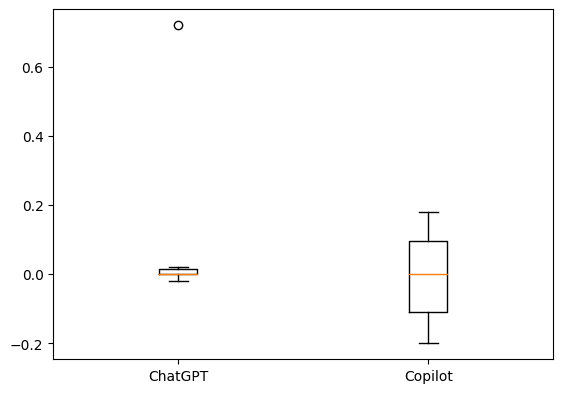

Quality
Difference Spring to Fall ChatGPT -0.12999999999999992 worse
Difference Spring to Fall Copilot 1.1233333333333333 better


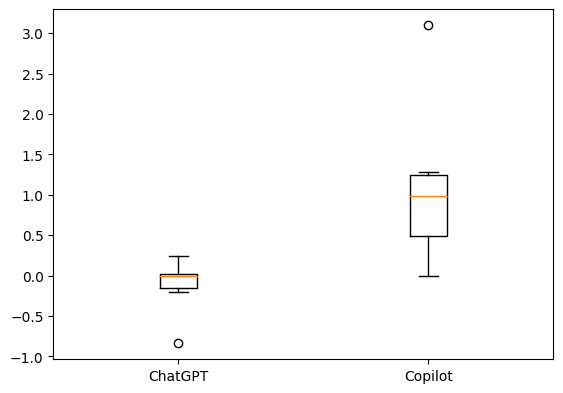

In [69]:
plot_diffs(chatgpt_diffs, copilot_diffs, "ChatGPT", "Copilot")

Sign test

In [55]:
def sign_test_diffs(df):
    for col in df.columns:
        print(col)
        differences = df[col].to_numpy()
        differences = differences[differences != 0]
        # Calculate the number of positive (self afficacy gain) and negative (loss) differences
        n_pos = np.sum(differences > 0)
        n_neg = np.sum(differences < 0)
        # We use the smaller of n_pos and n_neg as our test statistic (for a two-tailed test)
        n = np.min([n_pos, n_neg])
 
        # Calculate p-value (two-tailed) using the binomial test
        p_value = stats.binom_test(n, n=n_pos + n_neg, p=0.5, alternative='two-sided') 
         
        # Interpret the p-value
        if p_value < 0.05:
            print(f'p-value: {p_value}',bcolors.OKGREEN +"PASS"+bcolors.ENDC)
        else:
            print(f'p-value: {p_value}',bcolors.FAIL +"FAIL"+bcolors.ENDC)

In [56]:
sign_test_diffs(df_diffs)

correctness_chatgp
p-value: 1.0 FAIL
correctness_copilot
p-value: 1.0 FAIL
quality_chatgpt
p-value: 1.0 FAIL
quality_copilot
p-value: 0.0625 FAIL


Wilcoxon Test

In [59]:
def wilcox_test_diffs(df):
    for col in df.columns:
        print(col)
        differences = df[col].to_numpy()
        res = wilcoxon(differences, alternative='greater')
 
        # Calculate p-value (two-tailed) using the binomial test
        p_value = res.pvalue
         
        # Interpret the p-value
        if p_value < 0.05:
            print(f'p-value: {p_value}',bcolors.OKGREEN +"PASS"+bcolors.ENDC)
        else:
            print(f'p-value: {p_value}',bcolors.FAIL +"FAIL"+bcolors.ENDC)


In [61]:
wilcox_test_diffs(df_diffs)

correctness_chatgp
p-value: 0.2071080891212626 FAIL
correctness_copilot
p-value: 0.578125 FAIL
quality_chatgpt
p-value: 0.6424996726559553 FAIL
quality_copilot
p-value: 0.021557223391537678 PASS


Check normality as preriquisite for the Wilcoxon Test. Too few data points actually.

(array([2., 3., 0., 1.]),
 array([0.   , 0.775, 1.55 , 2.325, 3.1  ]),
 <BarContainer object of 4 artists>)

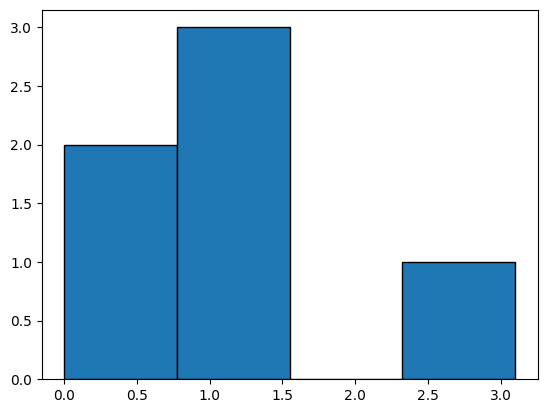

In [63]:
plt.hist(df_diffs['quality_copilot'].to_numpy(), edgecolor='black', bins=4)